In [1]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv
import src.tuning as t

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

# Tuning: communication network

In [2]:
# Instantiate tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
<ipython-input-2-de98555a1030>:2: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  tuning =  t.Tuning()
/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:21: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


## 1. Grid search: crude (400 parameter combinations)
note: communication network misses two nodes, because they had no communication with others in their class <br>
missing: number 1653 & 5017

In [3]:
# specify parameter space for grid search
seq = np.arange(0,1.05,0.05)

### 1.1 Run grid search simulations

In [4]:
# Run simulation
result_error, result_child, result_cl, empirical_data = tuning.execute(t_range=seq,
                                                                       i_range=seq,
                                                                       t=700,
                                                                       population_name='communication')

thres_PA: 0.0  I_PA: 0.0  error: 0.6064453053673677 |runtime: 6.1964271068573
thres_PA: 0.0  I_PA: 0.05  error: 16.361226185820847 |runtime: 6.13093900680542
thres_PA: 0.0  I_PA: 0.1  error: 39.34801910706556 |runtime: 6.482038974761963
thres_PA: 0.0  I_PA: 0.15000000000000002  error: 41.7684517492336 |runtime: 6.845820903778076
thres_PA: 0.0  I_PA: 0.2  error: 41.80275353035012 |runtime: 6.580898761749268
thres_PA: 0.0  I_PA: 0.25  error: 41.87982032674713 |runtime: 6.167339086532593
thres_PA: 0.0  I_PA: 0.30000000000000004  error: 41.86667452258293 |runtime: 6.3124449253082275
thres_PA: 0.0  I_PA: 0.35000000000000003  error: 41.88145595225159 |runtime: 6.078104019165039
thres_PA: 0.0  I_PA: 0.4  error: 41.33296148203247 |runtime: 6.252033710479736
thres_PA: 0.0  I_PA: 0.45  error: 41.93204105118633 |runtime: 6.7448530197143555
thres_PA: 0.0  I_PA: 0.5  error: 41.957703263273395 |runtime: 7.825336694717407
thres_PA: 0.0  I_PA: 0.55  error: 42.008245155735445 |runtime: 6.64166522026062

### 1.2 Results

In [5]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0,,,,,,,,,,,,,,,,,,,,,
0.00,0.606445,16.361226,39.348019,41.768452,41.802754,41.879820,4.186667e+01,41.881456,41.332961,41.932041,...,4.200825e+01,41.982407,42.037196,42.052986,4.208085e+01,4.210626e+01,42.103887,42.102286,42.120964,42.187880
0.05,0.606445,386.735456,83.968927,27.183840,8.460745,3.324015,2.451743e+00,3.425207,5.078068,7.012212,...,5.783516e+05,369.867114,15.865088,19.314957,2.106552e+01,2.428350e+01,24.686083,30.082099,34.344200,42.187880
0.10,0.606445,227.488755,572.693145,242.397499,117.618428,70.776374,3.423325e+01,23.346797,9.512707,6.557146,...,2.190288e+00,3.348443,4.434739,5.727973,3.887665e+43,1.160595e+01,14.054189,18.358230,25.775018,42.187880
0.15,0.606445,1.735168,445.626890,679.277689,384.577810,278.459229,5.285561e+06,93.953628,59.837393,44.405532,...,9.725139e+14,9.381766,5.916883,3.119063,3.717304e+00,5.409038e+00,5.018893,11.008902,22.571103,41.948928
0.20,0.606445,1.632935,522.516555,424.556749,667.195517,434.262413,2.761266e+02,225.530197,196.343846,100.940617,...,1.086412e+07,34.231207,17.950262,10.524536,1.046879e+01,3.864891e+20,4.521340,9.094815,19.035783,38.759947
0.25,0.606445,1.537604,812.572511,115.226279,706.433570,583.544646,5.215265e+02,315.703242,250.752861,205.364113,...,1.050406e+02,85.441454,38.869722,27.937716,1.542346e+01,3.132543e+16,5.958869,5.989066,12.357252,35.639758
0.30,0.606445,1.444117,639.623159,2.260623,460.603465,677.920214,4.524698e+02,533.605493,353.979922,296.906351,...,1.444446e+02,107034.804913,84.312893,63.319633,3.521152e+01,1.814291e+01,8.388178,9.504575,12.540611,29.622842
0.35,0.606445,1.312332,868.307092,2.043260,361.167625,702.288007,5.223420e+02,585.149830,475.679790,469.012667,...,2.628759e+02,208.225489,121.105158,74.538409,6.050444e+01,3.785370e+01,35.414764,11.684474,6.743214,29.560710
0.40,0.606445,1.251486,1.410050,1.636212,426.021578,274.223378,4.924108e+02,677.865080,476.958755,576.723466,...,1.410719e+10,1664.108219,120.348971,129.729860,9.577824e+01,5.845958e+01,41.996151,20.541246,26.553764,22.741241


Text(0.5, 105.0, 'I PA')

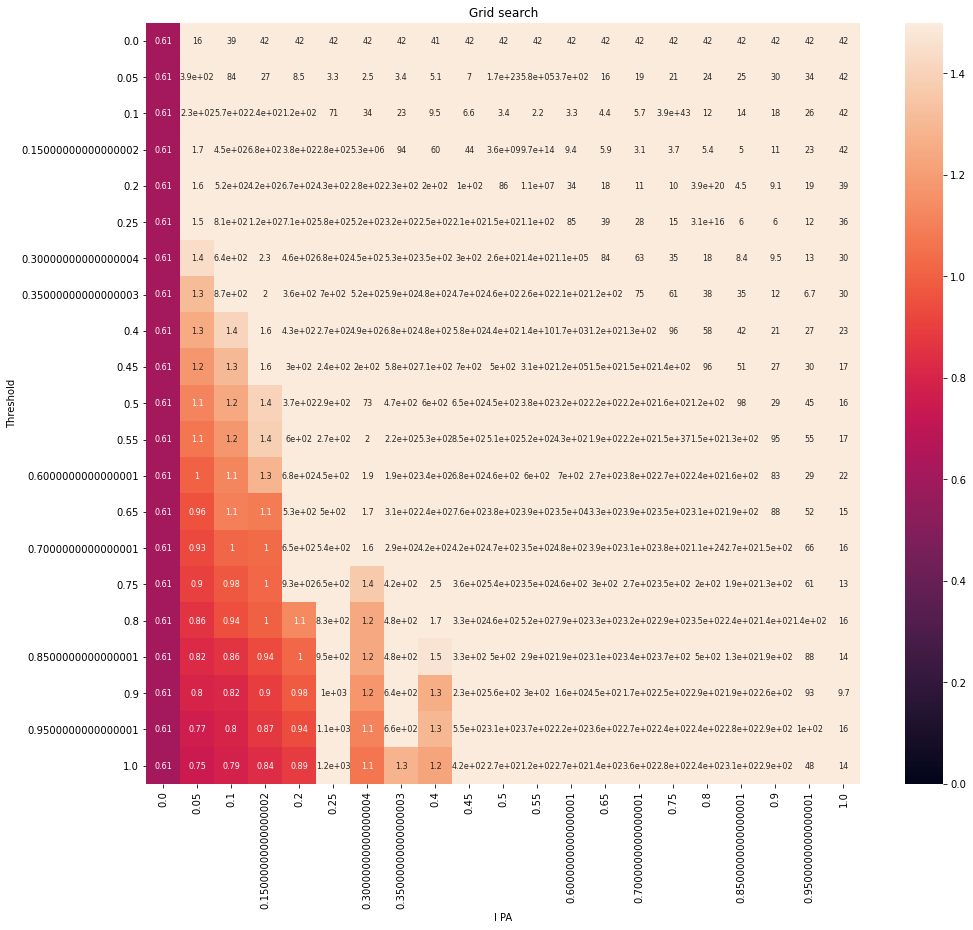

In [6]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=1.5)
plt.ylabel('Threshold')
plt.xlabel('I PA')

## 2. Grid search: subspace (2000 parameter combinations)

In [7]:
# specify parameter space for grid search
t_seq = np.arange(0.025,1.025,0.025)
i_seq = np.arange(0.001,0.051,0.001)


### 2.1 Run grid search simulations

In [8]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute(t_range=t_seq,
                                                                           i_range=i_seq,
                                                                           t=700,
                                                                           population_name='communication')

thres_PA: 0.025  I_PA: 0.001  error: 0.8658781796628351 |runtime: 5.962025165557861
thres_PA: 0.025  I_PA: 0.002  error: 1.231272546303298 |runtime: 5.84407901763916
thres_PA: 0.025  I_PA: 0.003  error: 1.2451875934250456 |runtime: 5.8574159145355225
thres_PA: 0.025  I_PA: 0.004  error: 1.2708619570527508 |runtime: 5.816049337387085
thres_PA: 0.025  I_PA: 0.005  error: 1.3112601174573946 |runtime: 5.796653747558594
thres_PA: 0.025  I_PA: 0.006  error: 1.3210728808687813 |runtime: 5.960073232650757
thres_PA: 0.025  I_PA: 0.007  error: 1.4390897777472693 |runtime: 5.9024131298065186
thres_PA: 0.025  I_PA: 0.008  error: 1.5068571797412282 |runtime: 5.971810817718506
thres_PA: 0.025  I_PA: 0.009000000000000001  error: 1.618455411778179 |runtime: 5.788545846939087
thres_PA: 0.025  I_PA: 0.010000000000000002  error: 1.5510738518466234 |runtime: 5.787375211715698
thres_PA: 0.025  I_PA: 0.011  error: 1.7203852303774096 |runtime: 6.33141565322876
thres_PA: 0.025  I_PA: 0.012  error: 1.710028258

### 2.2 Results

In [9]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010,...,0.041,0.042,0.043,0.044,0.045,0.046,0.047,0.048,0.049,0.050
0,,,,,,,,,,,,,,,,,,,,,
0.025,0.865878,1.231273,1.245188,1.270862,1.311260,1.321073,1.439090,1.506857,1.618455,1.551074,...,119.521795,118.122305,128.373393,130.493363,90.549026,88.613699,78.805926,73.437487,81.410302,84.760377
0.050,0.802259,1.191900,1.194363,1.203269,1.227165,1.222581,1.234928,1.241483,1.282877,1.305365,...,465.762336,347.249525,433.407355,447.007818,431.433531,478.548994,419.981284,426.999744,468.419308,386.735456
0.075,0.813100,1.229224,1.228982,1.232824,1.247713,1.248914,1.257760,1.273482,1.287210,1.314027,...,71.857230,204.531361,196.003887,203.738672,471.492196,112.424608,543.025068,277.665866,60.792580,626.367735
0.100,0.856930,1.286871,1.288646,1.299268,1.311357,1.308539,1.326473,1.335250,1.347723,1.347566,...,1.783941,1.939437,1.942519,1.842432,1.971680,2.098828,1.943816,157.716376,115.977940,227.488755
0.125,0.887766,1.309033,1.310370,1.317323,1.330184,1.330130,1.340858,1.348688,1.360414,1.369322,...,1.740340,1.685112,1.831990,1.773501,1.730192,1.870038,1.951472,293.284470,2.313857,438.453218
0.150,0.910321,1.311982,1.310447,1.316042,1.321034,1.315389,1.327170,1.337801,1.346017,1.343967,...,1.622907,1.625376,1.631734,1.570829,1.652804,1.644913,1.595163,1.697601,1.726919,1.735168
0.175,0.939677,1.337883,1.341313,1.342364,1.343107,1.355240,1.352741,1.361434,1.363205,1.369377,...,1.509363,1.545839,1.543040,1.597922,1.609027,1.572543,1.587710,1.621224,1.604684,1.606028
0.200,0.955205,1.346150,1.347820,1.352467,1.354567,1.358399,1.358892,1.366809,1.382182,1.383186,...,1.551653,1.568615,1.575125,1.558722,1.586726,1.629929,1.636571,1.638046,1.629861,1.632935
0.225,0.965627,1.342946,1.342169,1.347435,1.352579,1.351690,1.361073,1.357346,1.371845,1.369767,...,1.524721,1.537823,1.517326,1.511119,1.543187,1.542557,1.518241,1.543047,1.533476,1.545683


Text(0.5, 105.0, 'I PA')

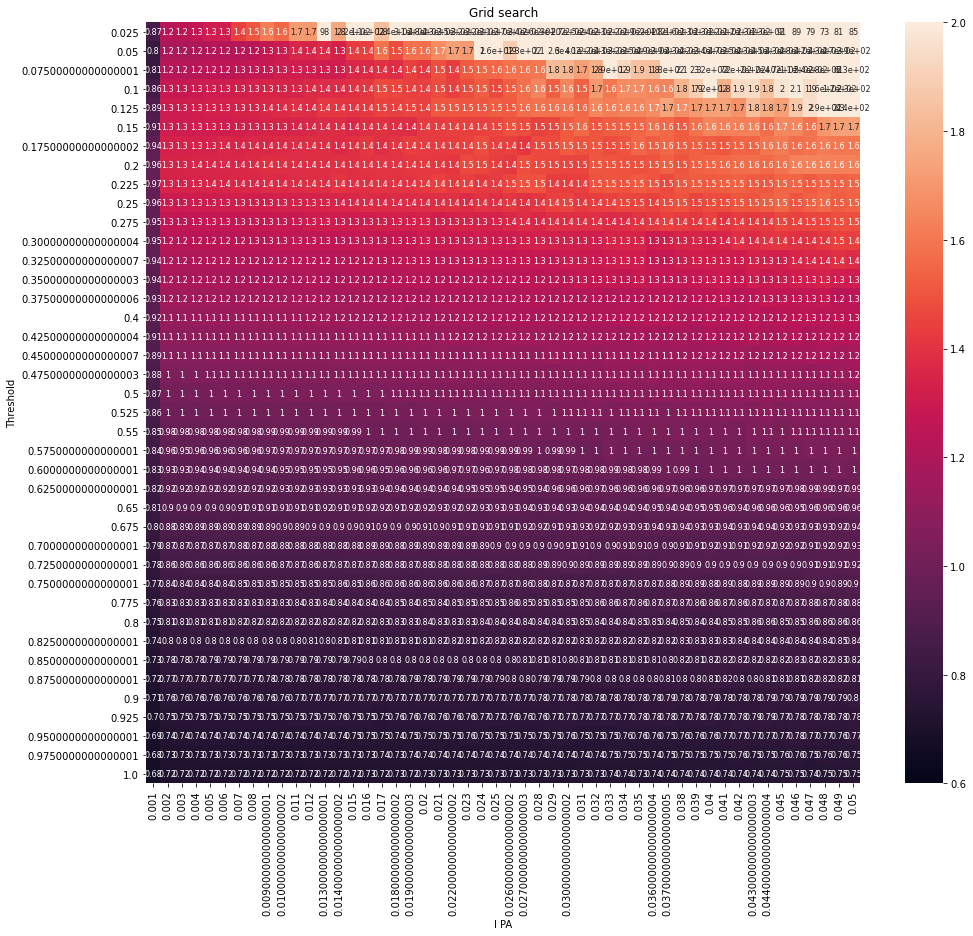

In [10]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 8}, vmin=0.6, vmax=2)
plt.ylabel('Threshold')
plt.xlabel('I PA')

0      1.389322
1      1.391435
2      1.393533
3      1.395535
4      1.397646
         ...   
695    1.477960
696    1.477960
697    1.477960
698    1.477960
699    1.477960
Length: 700, dtype: float64

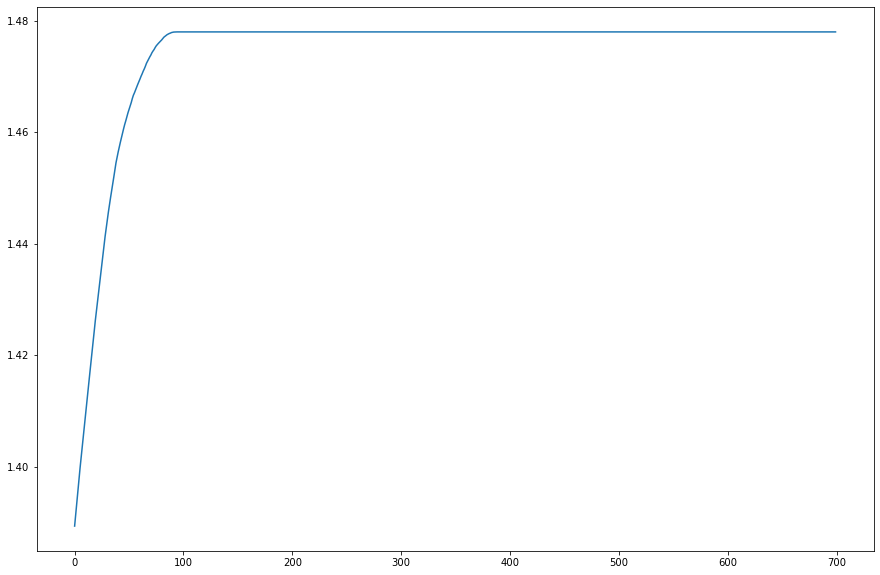

In [11]:
# Plot single parameter combination (for visualization)
a = pd.DataFrame(result_cl2[1961]).mean(axis=1)
a.plot(figsize=((15,10)))
a


### 2.3 Select best fitting parameter combinations

In [12]:
sort_errors = result_error2
opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars

[(1.0, 0.001, 0.6757498962003019),
 (0.9750000000000001, 0.001, 0.6834437608234766),
 (0.9500000000000001, 0.001, 0.6917401865790285),
 (0.925, 0.001, 0.7005767005207331),
 (0.9, 0.001, 0.7093250200400483),
 (1.0, 0.002, 0.715985804711273),
 (1.0, 0.003, 0.716621677413307),
 (1.0, 0.004, 0.7170634600526897),
 (1.0, 0.006, 0.7181745853150729),
 (0.8750000000000001, 0.001, 0.7183937836896465),
 (1.0, 0.005, 0.7186164152131637),
 (1.0, 0.011, 0.7190048644763888),
 (1.0, 0.010000000000000002, 0.7190434195216167),
 (1.0, 0.008, 0.7190822125380362),
 (1.0, 0.009000000000000001, 0.7191497738409042),
 (1.0, 0.007, 0.7196789095003753),
 (1.0, 0.013000000000000001, 0.7209123381877883),
 (1.0, 0.015, 0.7215479677414973),
 (1.0, 0.012, 0.7216975182312833),
 (1.0, 0.017, 0.7224096203598959),
 (1.0, 0.014000000000000002, 0.7236843344548327),
 (1.0, 0.019000000000000003, 0.7247022027005215),
 (1.0, 0.018000000000000002, 0.7251191828556848),
 (1.0, 0.016, 0.7251354503019195),
 (0.9750000000000001, 0.0

In [13]:
# Save parameter combinations in csv

with open('../output/tuning/opt_pars_communication.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)